In [61]:
data = pd.read_csv("./data.csv")
data.drop(['id','Unnamed: 32'],1,inplace=True)

In [62]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,M,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,M,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,M,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [63]:
data.shape

(569, 31)

In [64]:
data['diagnosis']= data['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)

In [65]:
train = data[:500]
test = data[500:]
target = test['diagnosis']
test.drop(['diagnosis'],1,inplace=True)

# StandardScaler

<AxesSubplot:>

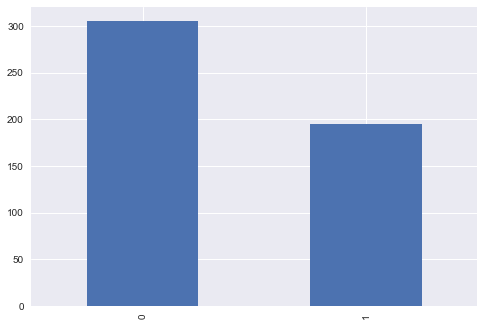

In [6]:
train['diagnosis'].value_counts().plot.bar()

In [66]:
X = train.iloc[:,1: ]
y = train.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

pred = model.predict(X_test)

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report

roc_auc_score(y_test,pred)

0.9773238380809596

---

위 과정을 pipeline으로 간결하게, 한 번에 작업이 가능합니다.

# PIPELINE

In [5]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('KNN',KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train,y_train)

roc_auc_score(y_test, pipe.predict(X_test))

0.9773238380809596

# Models

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

X = train.iloc[:,1: ]
y = train.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)

accuracy=[]
models=[RandomForestClassifier,LogisticRegression,SVC,KNeighborsClassifier,LGBMClassifier,XGBClassifier,CatBoostClassifier]

for i in models:
    clf=i()
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    
algorism=['rf_clf','lr_clf','svc','knn','lgbm_clf','xgb_clf','cb_clf']

for i in algorism:
    if i=='rf_clf':
        lr_clf=RandomForestClassifier(random_state=42)
    elif i=='lr_clf':
        rf_clf=LogisticRegression(random_state=42)
    elif i=='svc':
        svc=SVC(kernel='linear',probability=True)
    elif i=='knn':
        knn_clf=KNeighborsClassifier()
    elif i=='cb_clf':
        cb_clf = CatBoostClassifier(random_state=42)
    elif i=='xgb_clf':
        xgb_clf=XGBClassifier(random_state=42)
    else:
        lgbm_clf=LGBMClassifier(random_state=42)

#앙상블!
vot_model=VotingClassifier(estimators=[('RandomForest',rf_clf),('LogisticRegression',lr_clf),('SVC',svc),('KNN',knn_clf),('LGBoost',lgbm_clf),('XGBoost',xgb_clf),('Catboost',cb_clf)],voting='soft')
vot_model.fit(X_train,y_train)
pred2=vot_model.predict(X_test)
accuracy.append(accuracy_score(y_test,pred2))

accuracy_data=pd.DataFrame(accuracy,index=['RandomForestClassifier','LogisticRegression','SVC','KNeighborsClassifier','LGBMClassifier','XGBClassifier','CatboostClassifier','Voting'],columns=['Accuracy'])
accuracy_data

[17:31:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.006777
0:	learn: 0.6822636	total: 9.01ms	remaining: 9.01s
1:	learn: 0.6725054	total: 11.3ms	remaining: 5.63s
2:	learn: 0.6631141	total: 12.9ms	remaining: 4.29s
3:	learn: 0.6540086	total: 14.8ms	remaining: 3.69s
4:	learn: 0.6433363	total: 16.7ms	remaining: 3.32s
5:	learn: 0.6352813	total: 18.4ms	remaining: 3.05s
6:	learn: 0.6244382	total: 20.1ms	remaining: 2.85s
7:	learn: 0.6149991	total: 21.8ms	remaining: 2.7s
8:	learn: 0.6045397	total: 23.9ms	remaining: 2.63s
9:	learn: 0.5954821	total: 25.5ms	remaining: 2.52s
10:	learn: 0.5867903	total: 27.2ms	remaining: 2.45s
11:	learn: 0.5780197	total: 29.2ms	remaining: 2.41s
12:	learn: 0.5698022	total: 31.1ms	remaining: 2.36s
13:	learn: 0.5608906	total: 32.8ms	remaining: 2.31s
1

163:	learn: 0.1221785	total: 311ms	remaining: 1.59s
164:	learn: 0.1213411	total: 313ms	remaining: 1.58s
165:	learn: 0.1203641	total: 315ms	remaining: 1.58s
166:	learn: 0.1197160	total: 317ms	remaining: 1.58s
167:	learn: 0.1187424	total: 318ms	remaining: 1.58s
168:	learn: 0.1180453	total: 320ms	remaining: 1.57s
169:	learn: 0.1171573	total: 322ms	remaining: 1.57s
170:	learn: 0.1164463	total: 324ms	remaining: 1.57s
171:	learn: 0.1157831	total: 326ms	remaining: 1.57s
172:	learn: 0.1150443	total: 328ms	remaining: 1.57s
173:	learn: 0.1141629	total: 331ms	remaining: 1.57s
174:	learn: 0.1134067	total: 333ms	remaining: 1.57s
175:	learn: 0.1125630	total: 335ms	remaining: 1.57s
176:	learn: 0.1119401	total: 337ms	remaining: 1.56s
177:	learn: 0.1110471	total: 339ms	remaining: 1.56s
178:	learn: 0.1104528	total: 341ms	remaining: 1.56s
179:	learn: 0.1096402	total: 343ms	remaining: 1.56s
180:	learn: 0.1089985	total: 345ms	remaining: 1.56s
181:	learn: 0.1083068	total: 347ms	remaining: 1.56s
182:	learn: 

363:	learn: 0.0473582	total: 698ms	remaining: 1.22s
364:	learn: 0.0472008	total: 701ms	remaining: 1.22s
365:	learn: 0.0470694	total: 703ms	remaining: 1.22s
366:	learn: 0.0468957	total: 705ms	remaining: 1.22s
367:	learn: 0.0467872	total: 707ms	remaining: 1.21s
368:	learn: 0.0466307	total: 709ms	remaining: 1.21s
369:	learn: 0.0465146	total: 712ms	remaining: 1.21s
370:	learn: 0.0462890	total: 714ms	remaining: 1.21s
371:	learn: 0.0461625	total: 716ms	remaining: 1.21s
372:	learn: 0.0459945	total: 718ms	remaining: 1.21s
373:	learn: 0.0458514	total: 721ms	remaining: 1.21s
374:	learn: 0.0456505	total: 723ms	remaining: 1.2s
375:	learn: 0.0455067	total: 725ms	remaining: 1.2s
376:	learn: 0.0452750	total: 728ms	remaining: 1.2s
377:	learn: 0.0451165	total: 730ms	remaining: 1.2s
378:	learn: 0.0449661	total: 733ms	remaining: 1.2s
379:	learn: 0.0447887	total: 736ms	remaining: 1.2s
380:	learn: 0.0446682	total: 738ms	remaining: 1.2s
381:	learn: 0.0445399	total: 740ms	remaining: 1.2s
382:	learn: 0.044441

567:	learn: 0.0266814	total: 1.09s	remaining: 827ms
568:	learn: 0.0266530	total: 1.09s	remaining: 825ms
569:	learn: 0.0265466	total: 1.09s	remaining: 824ms
570:	learn: 0.0264768	total: 1.09s	remaining: 822ms
571:	learn: 0.0263958	total: 1.1s	remaining: 820ms
572:	learn: 0.0263457	total: 1.1s	remaining: 819ms
573:	learn: 0.0263042	total: 1.1s	remaining: 817ms
574:	learn: 0.0262423	total: 1.1s	remaining: 815ms
575:	learn: 0.0261855	total: 1.1s	remaining: 814ms
576:	learn: 0.0260930	total: 1.11s	remaining: 812ms
577:	learn: 0.0260636	total: 1.11s	remaining: 810ms
578:	learn: 0.0259931	total: 1.11s	remaining: 808ms
579:	learn: 0.0259355	total: 1.11s	remaining: 806ms
580:	learn: 0.0259236	total: 1.11s	remaining: 804ms
581:	learn: 0.0258643	total: 1.12s	remaining: 802ms
582:	learn: 0.0258236	total: 1.12s	remaining: 800ms
583:	learn: 0.0257568	total: 1.12s	remaining: 798ms
584:	learn: 0.0256939	total: 1.12s	remaining: 796ms
585:	learn: 0.0256274	total: 1.12s	remaining: 794ms
586:	learn: 0.025

768:	learn: 0.0179255	total: 1.47s	remaining: 442ms
769:	learn: 0.0178868	total: 1.47s	remaining: 440ms
770:	learn: 0.0178520	total: 1.48s	remaining: 439ms
771:	learn: 0.0178169	total: 1.48s	remaining: 437ms
772:	learn: 0.0177719	total: 1.48s	remaining: 435ms
773:	learn: 0.0177376	total: 1.48s	remaining: 433ms
774:	learn: 0.0177227	total: 1.49s	remaining: 431ms
775:	learn: 0.0177189	total: 1.49s	remaining: 429ms
776:	learn: 0.0177157	total: 1.49s	remaining: 428ms
777:	learn: 0.0176746	total: 1.49s	remaining: 426ms
778:	learn: 0.0176424	total: 1.49s	remaining: 424ms
779:	learn: 0.0176130	total: 1.5s	remaining: 422ms
780:	learn: 0.0175723	total: 1.5s	remaining: 421ms
781:	learn: 0.0175478	total: 1.5s	remaining: 419ms
782:	learn: 0.0175276	total: 1.5s	remaining: 417ms
783:	learn: 0.0174892	total: 1.51s	remaining: 415ms
784:	learn: 0.0174635	total: 1.51s	remaining: 413ms
785:	learn: 0.0174501	total: 1.51s	remaining: 411ms
786:	learn: 0.0174405	total: 1.51s	remaining: 410ms
787:	learn: 0.01

977:	learn: 0.0130471	total: 1.86s	remaining: 41.8ms
978:	learn: 0.0130144	total: 1.86s	remaining: 39.9ms
979:	learn: 0.0130030	total: 1.86s	remaining: 38ms
980:	learn: 0.0129757	total: 1.86s	remaining: 36.1ms
981:	learn: 0.0129691	total: 1.87s	remaining: 34.2ms
982:	learn: 0.0129361	total: 1.87s	remaining: 32.3ms
983:	learn: 0.0129016	total: 1.87s	remaining: 30.4ms
984:	learn: 0.0128674	total: 1.87s	remaining: 28.5ms
985:	learn: 0.0128637	total: 1.88s	remaining: 26.6ms
986:	learn: 0.0128382	total: 1.88s	remaining: 24.7ms
987:	learn: 0.0128120	total: 1.88s	remaining: 22.8ms
988:	learn: 0.0127864	total: 1.88s	remaining: 20.9ms
989:	learn: 0.0127821	total: 1.88s	remaining: 19ms
990:	learn: 0.0127588	total: 1.89s	remaining: 17.1ms
991:	learn: 0.0127407	total: 1.89s	remaining: 15.2ms
992:	learn: 0.0127385	total: 1.89s	remaining: 13.3ms
993:	learn: 0.0127287	total: 1.89s	remaining: 11.4ms
994:	learn: 0.0127214	total: 1.89s	remaining: 9.51ms
995:	learn: 0.0127060	total: 1.89s	remaining: 7.61

186:	learn: 0.1025664	total: 348ms	remaining: 1.51s
187:	learn: 0.1018332	total: 350ms	remaining: 1.51s
188:	learn: 0.1012564	total: 352ms	remaining: 1.51s
189:	learn: 0.1006362	total: 355ms	remaining: 1.51s
190:	learn: 0.0998950	total: 357ms	remaining: 1.51s
191:	learn: 0.0992725	total: 359ms	remaining: 1.51s
192:	learn: 0.0987366	total: 361ms	remaining: 1.51s
193:	learn: 0.0982492	total: 363ms	remaining: 1.51s
194:	learn: 0.0976429	total: 365ms	remaining: 1.51s
195:	learn: 0.0970211	total: 367ms	remaining: 1.5s
196:	learn: 0.0965255	total: 370ms	remaining: 1.51s
197:	learn: 0.0959062	total: 372ms	remaining: 1.51s
198:	learn: 0.0953649	total: 374ms	remaining: 1.5s
199:	learn: 0.0947026	total: 376ms	remaining: 1.5s
200:	learn: 0.0942035	total: 378ms	remaining: 1.5s
201:	learn: 0.0936145	total: 380ms	remaining: 1.5s
202:	learn: 0.0931779	total: 382ms	remaining: 1.5s
203:	learn: 0.0926989	total: 384ms	remaining: 1.5s
204:	learn: 0.0921761	total: 386ms	remaining: 1.5s
205:	learn: 0.091641

395:	learn: 0.0430981	total: 735ms	remaining: 1.12s
396:	learn: 0.0428844	total: 737ms	remaining: 1.12s
397:	learn: 0.0427483	total: 739ms	remaining: 1.12s
398:	learn: 0.0425411	total: 741ms	remaining: 1.12s
399:	learn: 0.0423863	total: 743ms	remaining: 1.11s
400:	learn: 0.0422784	total: 745ms	remaining: 1.11s
401:	learn: 0.0421773	total: 747ms	remaining: 1.11s
402:	learn: 0.0420721	total: 749ms	remaining: 1.11s
403:	learn: 0.0419585	total: 751ms	remaining: 1.11s
404:	learn: 0.0418093	total: 753ms	remaining: 1.1s
405:	learn: 0.0416646	total: 755ms	remaining: 1.1s
406:	learn: 0.0415337	total: 757ms	remaining: 1.1s
407:	learn: 0.0413830	total: 759ms	remaining: 1.1s
408:	learn: 0.0412936	total: 761ms	remaining: 1.1s
409:	learn: 0.0411772	total: 763ms	remaining: 1.1s
410:	learn: 0.0410898	total: 766ms	remaining: 1.1s
411:	learn: 0.0409564	total: 767ms	remaining: 1.09s
412:	learn: 0.0408418	total: 769ms	remaining: 1.09s
413:	learn: 0.0406691	total: 771ms	remaining: 1.09s
414:	learn: 0.04050

610:	learn: 0.0249242	total: 1.12s	remaining: 716ms
611:	learn: 0.0248690	total: 1.13s	remaining: 714ms
612:	learn: 0.0248192	total: 1.13s	remaining: 713ms
613:	learn: 0.0247635	total: 1.13s	remaining: 711ms
614:	learn: 0.0247196	total: 1.13s	remaining: 709ms
615:	learn: 0.0246640	total: 1.14s	remaining: 708ms
616:	learn: 0.0246229	total: 1.14s	remaining: 706ms
617:	learn: 0.0245801	total: 1.14s	remaining: 704ms
618:	learn: 0.0245251	total: 1.14s	remaining: 703ms
619:	learn: 0.0244973	total: 1.14s	remaining: 701ms
620:	learn: 0.0244898	total: 1.15s	remaining: 700ms
621:	learn: 0.0244545	total: 1.15s	remaining: 698ms
622:	learn: 0.0243892	total: 1.15s	remaining: 696ms
623:	learn: 0.0243329	total: 1.15s	remaining: 694ms
624:	learn: 0.0242636	total: 1.15s	remaining: 692ms
625:	learn: 0.0241932	total: 1.16s	remaining: 690ms
626:	learn: 0.0241796	total: 1.16s	remaining: 689ms
627:	learn: 0.0241234	total: 1.16s	remaining: 687ms
628:	learn: 0.0240855	total: 1.16s	remaining: 685ms
629:	learn: 

815:	learn: 0.0169788	total: 1.51s	remaining: 341ms
816:	learn: 0.0169725	total: 1.51s	remaining: 339ms
817:	learn: 0.0169308	total: 1.51s	remaining: 337ms
818:	learn: 0.0168923	total: 1.52s	remaining: 335ms
819:	learn: 0.0168634	total: 1.52s	remaining: 333ms
820:	learn: 0.0168370	total: 1.52s	remaining: 332ms
821:	learn: 0.0167958	total: 1.52s	remaining: 330ms
822:	learn: 0.0167543	total: 1.52s	remaining: 328ms
823:	learn: 0.0167316	total: 1.53s	remaining: 326ms
824:	learn: 0.0167034	total: 1.53s	remaining: 324ms
825:	learn: 0.0166842	total: 1.53s	remaining: 323ms
826:	learn: 0.0166605	total: 1.53s	remaining: 321ms
827:	learn: 0.0166177	total: 1.53s	remaining: 319ms
828:	learn: 0.0165742	total: 1.54s	remaining: 317ms
829:	learn: 0.0165302	total: 1.54s	remaining: 315ms
830:	learn: 0.0164958	total: 1.54s	remaining: 314ms
831:	learn: 0.0164383	total: 1.54s	remaining: 312ms
832:	learn: 0.0164005	total: 1.54s	remaining: 310ms
833:	learn: 0.0163554	total: 1.55s	remaining: 308ms
834:	learn: 

,Accuracy
RandomForestClassifier,0.9600
LogisticRegression,0.9440
SVC,0.9200
KNeighborsClassifier,0.9520
LGBMClassifier,0.9440
XGBClassifier,0.9520
CatboostClassifier,0.9680
Voting,0.9760


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

X = train.iloc[:,1: ]
y = train.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

accuracy=[]
models=[RandomForestClassifier,LogisticRegression,SVC,KNeighborsClassifier,LGBMClassifier,XGBClassifier,CatBoostClassifier]

for i in models:
    clf=i()
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    
algorism=['rf_clf','lr_clf','svc','knn','lgbm_clf','xgb_clf','cb_clf']

for i in algorism:
    if i=='rf_clf':
        lr_clf=RandomForestClassifier(random_state=42)
    elif i=='lr_clf':
        rf_clf=LogisticRegression(random_state=42)
    elif i=='svc':
        svc=SVC(kernel='linear',probability=True)
    elif i=='knn':
        knn_clf=KNeighborsClassifier()
    elif i=='cb_clf':
        cb_clf = CatBoostClassifier(random_state=42)
    elif i=='xgb_clf':
        xgb_clf=XGBClassifier(random_state=42)
    else:
        lgbm_clf=LGBMClassifier(random_state=42)

#앙상블!
vot_model=VotingClassifier(estimators=[('RandomForest',rf_clf),('LogisticRegression',lr_clf),('SVC',svc),('KNN',knn_clf),('LGBoost',lgbm_clf),('XGBoost',xgb_clf),('Catboost',cb_clf)],voting='soft')
vot_model.fit(X_train,y_train)
pred2=vot_model.predict(X_test)
accuracy.append(accuracy_score(y_test,pred2))

accuracy_data=pd.DataFrame(accuracy,index=['RandomForestClassifier','LogisticRegression','SVC','KNeighborsClassifier','LGBMClassifier','XGBClassifier','CatboostClassifier','Voting'],columns=['Accuracy'])
accuracy_data

[17:32:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.00658
0:	learn: 0.6822826	total: 2.39ms	remaining: 2.39s
1:	learn: 0.6728725	total: 4.42ms	remaining: 2.2s
2:	learn: 0.6634260	total: 6.42ms	remaining: 2.13s
3:	learn: 0.6560777	total: 8.52ms	remaining: 2.12s
4:	learn: 0.6461087	total: 10.5ms	remaining: 2.09s
5:	learn: 0.6383959	total: 12.3ms	remaining: 2.04s
6:	learn: 0.6287276	total: 14.1ms	remaining: 2s
7:	learn: 0.6195595	total: 16ms	remaining: 1.99s
8:	learn: 0.6088917	total: 17.8ms	remaining: 1.96s
9:	learn: 0.6004885	total: 19.6ms	remaining: 1.94s
10:	learn: 0.5923762	total: 21.4ms	remaining: 1.92s
11:	learn: 0.5842295	total: 23.4ms	remaining: 1.93s
12:	learn: 0.5759056	total: 25.3ms	remaining: 1.92s
13:	learn: 0.5683703	total: 27.2ms	remaining: 1.92s
14:	lea

187:	learn: 0.1165067	total: 356ms	remaining: 1.54s
188:	learn: 0.1158301	total: 358ms	remaining: 1.54s
189:	learn: 0.1149939	total: 360ms	remaining: 1.54s
190:	learn: 0.1143911	total: 362ms	remaining: 1.53s
191:	learn: 0.1137462	total: 365ms	remaining: 1.53s
192:	learn: 0.1131981	total: 367ms	remaining: 1.53s
193:	learn: 0.1126180	total: 369ms	remaining: 1.53s
194:	learn: 0.1120759	total: 371ms	remaining: 1.53s
195:	learn: 0.1114479	total: 373ms	remaining: 1.53s
196:	learn: 0.1109164	total: 375ms	remaining: 1.53s
197:	learn: 0.1102161	total: 377ms	remaining: 1.53s
198:	learn: 0.1095615	total: 379ms	remaining: 1.52s
199:	learn: 0.1091994	total: 381ms	remaining: 1.52s
200:	learn: 0.1085046	total: 383ms	remaining: 1.52s
201:	learn: 0.1079130	total: 385ms	remaining: 1.52s
202:	learn: 0.1072294	total: 388ms	remaining: 1.52s
203:	learn: 0.1068677	total: 390ms	remaining: 1.52s
204:	learn: 0.1063471	total: 392ms	remaining: 1.52s
205:	learn: 0.1059017	total: 395ms	remaining: 1.52s
206:	learn: 

374:	learn: 0.0536050	total: 741ms	remaining: 1.24s
375:	learn: 0.0533587	total: 744ms	remaining: 1.23s
376:	learn: 0.0531912	total: 746ms	remaining: 1.23s
377:	learn: 0.0530078	total: 749ms	remaining: 1.23s
378:	learn: 0.0528026	total: 751ms	remaining: 1.23s
379:	learn: 0.0525839	total: 754ms	remaining: 1.23s
380:	learn: 0.0524089	total: 756ms	remaining: 1.23s
381:	learn: 0.0522387	total: 758ms	remaining: 1.23s
382:	learn: 0.0520413	total: 760ms	remaining: 1.22s
383:	learn: 0.0519034	total: 763ms	remaining: 1.22s
384:	learn: 0.0517074	total: 765ms	remaining: 1.22s
385:	learn: 0.0514809	total: 767ms	remaining: 1.22s
386:	learn: 0.0513608	total: 770ms	remaining: 1.22s
387:	learn: 0.0511951	total: 772ms	remaining: 1.22s
388:	learn: 0.0509790	total: 774ms	remaining: 1.22s
389:	learn: 0.0507838	total: 776ms	remaining: 1.21s
390:	learn: 0.0506581	total: 778ms	remaining: 1.21s
391:	learn: 0.0505265	total: 780ms	remaining: 1.21s
392:	learn: 0.0503799	total: 783ms	remaining: 1.21s
393:	learn: 

578:	learn: 0.0305795	total: 1.13s	remaining: 820ms
579:	learn: 0.0305238	total: 1.13s	remaining: 818ms
580:	learn: 0.0304308	total: 1.13s	remaining: 816ms
581:	learn: 0.0304006	total: 1.13s	remaining: 814ms
582:	learn: 0.0303520	total: 1.14s	remaining: 812ms
583:	learn: 0.0302634	total: 1.14s	remaining: 810ms
584:	learn: 0.0302033	total: 1.14s	remaining: 808ms
585:	learn: 0.0301342	total: 1.14s	remaining: 806ms
586:	learn: 0.0300477	total: 1.14s	remaining: 805ms
587:	learn: 0.0299862	total: 1.15s	remaining: 803ms
588:	learn: 0.0299216	total: 1.15s	remaining: 801ms
589:	learn: 0.0298650	total: 1.15s	remaining: 799ms
590:	learn: 0.0297966	total: 1.15s	remaining: 797ms
591:	learn: 0.0297469	total: 1.15s	remaining: 795ms
592:	learn: 0.0296908	total: 1.16s	remaining: 793ms
593:	learn: 0.0296226	total: 1.16s	remaining: 791ms
594:	learn: 0.0295541	total: 1.16s	remaining: 789ms
595:	learn: 0.0294571	total: 1.16s	remaining: 787ms
596:	learn: 0.0293764	total: 1.16s	remaining: 785ms
597:	learn: 

788:	learn: 0.0195816	total: 1.51s	remaining: 405ms
789:	learn: 0.0195401	total: 1.52s	remaining: 403ms
790:	learn: 0.0195042	total: 1.52s	remaining: 401ms
791:	learn: 0.0194568	total: 1.52s	remaining: 399ms
792:	learn: 0.0194493	total: 1.52s	remaining: 398ms
793:	learn: 0.0194202	total: 1.52s	remaining: 396ms
794:	learn: 0.0193860	total: 1.53s	remaining: 394ms
795:	learn: 0.0193507	total: 1.53s	remaining: 392ms
796:	learn: 0.0193190	total: 1.53s	remaining: 390ms
797:	learn: 0.0192719	total: 1.53s	remaining: 388ms
798:	learn: 0.0192432	total: 1.53s	remaining: 386ms
799:	learn: 0.0192001	total: 1.54s	remaining: 385ms
800:	learn: 0.0191762	total: 1.54s	remaining: 383ms
801:	learn: 0.0191325	total: 1.54s	remaining: 381ms
802:	learn: 0.0191012	total: 1.54s	remaining: 379ms
803:	learn: 0.0190692	total: 1.54s	remaining: 377ms
804:	learn: 0.0190213	total: 1.55s	remaining: 375ms
805:	learn: 0.0189753	total: 1.55s	remaining: 373ms
806:	learn: 0.0189499	total: 1.55s	remaining: 371ms
807:	learn: 

995:	learn: 0.0138313	total: 1.9s	remaining: 7.64ms
996:	learn: 0.0138041	total: 1.91s	remaining: 5.73ms
997:	learn: 0.0137832	total: 1.91s	remaining: 3.82ms
998:	learn: 0.0137585	total: 1.91s	remaining: 1.91ms
999:	learn: 0.0137333	total: 1.91s	remaining: 0us
[17:32:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.00658
0:	learn: 0.6828421	total: 1.83ms	remaining: 1.83s
1:	learn: 0.6727782	total: 3.76ms	remaining: 1.88s
2:	learn: 0.6631127	total: 6.5ms	remaining: 2.16s
3:	learn: 0.6538339	total: 8.81ms	remaining: 2.19s
4:	learn: 0.6455263	total: 11.3ms	remaining: 2.25s
5:	learn: 0.6356568	total: 13.2ms	remaining: 2.18s
6:	learn: 0.6264289	total: 14.9ms	remaining: 2.11s
7:	learn: 0.6180610	total: 17.7ms	remaining: 2.19s
8:	learn: 0.6086706	total: 19.5ms	remaining: 2.15s


162:	learn: 0.1358016	total: 334ms	remaining: 1.72s
163:	learn: 0.1348852	total: 336ms	remaining: 1.71s
164:	learn: 0.1340377	total: 338ms	remaining: 1.71s
165:	learn: 0.1330475	total: 341ms	remaining: 1.71s
166:	learn: 0.1322940	total: 343ms	remaining: 1.71s
167:	learn: 0.1316397	total: 345ms	remaining: 1.71s
168:	learn: 0.1308746	total: 347ms	remaining: 1.71s
169:	learn: 0.1300255	total: 349ms	remaining: 1.7s
170:	learn: 0.1293718	total: 351ms	remaining: 1.7s
171:	learn: 0.1283929	total: 353ms	remaining: 1.7s
172:	learn: 0.1276476	total: 356ms	remaining: 1.7s
173:	learn: 0.1268714	total: 358ms	remaining: 1.7s
174:	learn: 0.1261878	total: 360ms	remaining: 1.7s
175:	learn: 0.1255441	total: 363ms	remaining: 1.7s
176:	learn: 0.1247294	total: 365ms	remaining: 1.7s
177:	learn: 0.1240515	total: 368ms	remaining: 1.7s
178:	learn: 0.1235366	total: 370ms	remaining: 1.7s
179:	learn: 0.1229883	total: 373ms	remaining: 1.7s
180:	learn: 0.1221066	total: 375ms	remaining: 1.7s
181:	learn: 0.1215900	to

358:	learn: 0.0554426	total: 719ms	remaining: 1.28s
359:	learn: 0.0552292	total: 721ms	remaining: 1.28s
360:	learn: 0.0550106	total: 723ms	remaining: 1.28s
361:	learn: 0.0548079	total: 725ms	remaining: 1.28s
362:	learn: 0.0546070	total: 727ms	remaining: 1.27s
363:	learn: 0.0544297	total: 729ms	remaining: 1.27s
364:	learn: 0.0542388	total: 731ms	remaining: 1.27s
365:	learn: 0.0540411	total: 733ms	remaining: 1.27s
366:	learn: 0.0538481	total: 735ms	remaining: 1.27s
367:	learn: 0.0536491	total: 737ms	remaining: 1.26s
368:	learn: 0.0534975	total: 739ms	remaining: 1.26s
369:	learn: 0.0533630	total: 742ms	remaining: 1.26s
370:	learn: 0.0530901	total: 745ms	remaining: 1.26s
371:	learn: 0.0529961	total: 746ms	remaining: 1.26s
372:	learn: 0.0528376	total: 748ms	remaining: 1.26s
373:	learn: 0.0525870	total: 750ms	remaining: 1.25s
374:	learn: 0.0524876	total: 752ms	remaining: 1.25s
375:	learn: 0.0522700	total: 754ms	remaining: 1.25s
376:	learn: 0.0521280	total: 756ms	remaining: 1.25s
377:	learn: 

569:	learn: 0.0308850	total: 1.11s	remaining: 835ms
570:	learn: 0.0307993	total: 1.11s	remaining: 833ms
571:	learn: 0.0306905	total: 1.11s	remaining: 831ms
572:	learn: 0.0306008	total: 1.11s	remaining: 829ms
573:	learn: 0.0305591	total: 1.11s	remaining: 828ms
574:	learn: 0.0304442	total: 1.12s	remaining: 826ms
575:	learn: 0.0303784	total: 1.12s	remaining: 824ms
576:	learn: 0.0303107	total: 1.12s	remaining: 822ms
577:	learn: 0.0302509	total: 1.12s	remaining: 820ms
578:	learn: 0.0302069	total: 1.13s	remaining: 818ms
579:	learn: 0.0301020	total: 1.13s	remaining: 817ms
580:	learn: 0.0300461	total: 1.13s	remaining: 815ms
581:	learn: 0.0299834	total: 1.13s	remaining: 813ms
582:	learn: 0.0299189	total: 1.13s	remaining: 811ms
583:	learn: 0.0298440	total: 1.14s	remaining: 809ms
584:	learn: 0.0297827	total: 1.14s	remaining: 806ms
585:	learn: 0.0296875	total: 1.14s	remaining: 805ms
586:	learn: 0.0296684	total: 1.14s	remaining: 803ms
587:	learn: 0.0296111	total: 1.14s	remaining: 801ms
588:	learn: 

784:	learn: 0.0195324	total: 1.5s	remaining: 410ms
785:	learn: 0.0194987	total: 1.5s	remaining: 408ms
786:	learn: 0.0194800	total: 1.5s	remaining: 406ms
787:	learn: 0.0194509	total: 1.5s	remaining: 404ms
788:	learn: 0.0194216	total: 1.5s	remaining: 402ms
789:	learn: 0.0193821	total: 1.5s	remaining: 400ms
790:	learn: 0.0193504	total: 1.51s	remaining: 398ms
791:	learn: 0.0193183	total: 1.51s	remaining: 396ms
792:	learn: 0.0192817	total: 1.51s	remaining: 394ms
793:	learn: 0.0192511	total: 1.51s	remaining: 392ms
794:	learn: 0.0192080	total: 1.51s	remaining: 391ms
795:	learn: 0.0191740	total: 1.52s	remaining: 389ms
796:	learn: 0.0191437	total: 1.52s	remaining: 387ms
797:	learn: 0.0191043	total: 1.52s	remaining: 385ms
798:	learn: 0.0190567	total: 1.52s	remaining: 383ms
799:	learn: 0.0190140	total: 1.52s	remaining: 381ms
800:	learn: 0.0189920	total: 1.53s	remaining: 379ms
801:	learn: 0.0189748	total: 1.53s	remaining: 378ms
802:	learn: 0.0189121	total: 1.53s	remaining: 376ms
803:	learn: 0.0188

967:	learn: 0.0142654	total: 1.88s	remaining: 62.1ms
968:	learn: 0.0142342	total: 1.88s	remaining: 60.2ms
969:	learn: 0.0142013	total: 1.88s	remaining: 58.2ms
970:	learn: 0.0141773	total: 1.89s	remaining: 56.3ms
971:	learn: 0.0141577	total: 1.89s	remaining: 54.4ms
972:	learn: 0.0141441	total: 1.89s	remaining: 52.4ms
973:	learn: 0.0141176	total: 1.89s	remaining: 50.5ms
974:	learn: 0.0140986	total: 1.89s	remaining: 48.6ms
975:	learn: 0.0140793	total: 1.9s	remaining: 46.6ms
976:	learn: 0.0140633	total: 1.9s	remaining: 44.7ms
977:	learn: 0.0140340	total: 1.9s	remaining: 42.7ms
978:	learn: 0.0140133	total: 1.9s	remaining: 40.8ms
979:	learn: 0.0139942	total: 1.9s	remaining: 38.9ms
980:	learn: 0.0139755	total: 1.91s	remaining: 36.9ms
981:	learn: 0.0139720	total: 1.91s	remaining: 35ms
982:	learn: 0.0139498	total: 1.91s	remaining: 33ms
983:	learn: 0.0139158	total: 1.91s	remaining: 31.1ms
984:	learn: 0.0138968	total: 1.91s	remaining: 29.1ms
985:	learn: 0.0138766	total: 1.92s	remaining: 27.2ms
98

,Accuracy
RandomForestClassifier,0.9667
LogisticRegression,0.9333
SVC,0.9200
KNeighborsClassifier,0.9467
LGBMClassifier,0.9733
XGBClassifier,0.9733
CatboostClassifier,0.9800
Voting,0.9800


**CatBoost는 학습률과 같은 튜닝을 알아서 해주기 때문에 하지 않겠습니다**

그래서, LGBM으로 작업을 하겠습니다.

In [8]:
#사용할 모델 정의
model = LGBMClassifier(random_state=42,)

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50,100,200],
    'min_child_samples':[10,20,30],
    'max_depth':[3,5,7,10,12],
    'learning_rate':[1,0.1,0.05,0.01,0.001]
}

# GridSearchCV

GridSearchCV는 params의 값들을 모두 조합하여 최적의 하이파라미터튜닝을 합니다.  
**데이터셋이 작은 경우에 사용해주는 것이 좋습니다**

In [9]:
gs = GridSearchCV(estimator=model, param_grid= params, n_jobs=-1,cv=5,scoring='accuracy')

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.05, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [10]:
#그래서 최적의 튜닝은?
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_samples': 20,
 'n_estimators': 200}

In [11]:
pred = gs.predict(X_test)
accuracy_score(y_test,pred)

0.98

하이퍼파라미터 튜닝으로 점수가 상승했습니다.  

아래는 위에서 보았던 None Tuning LGBMClassifier의 정확도, 0.9733입니다.

<div>
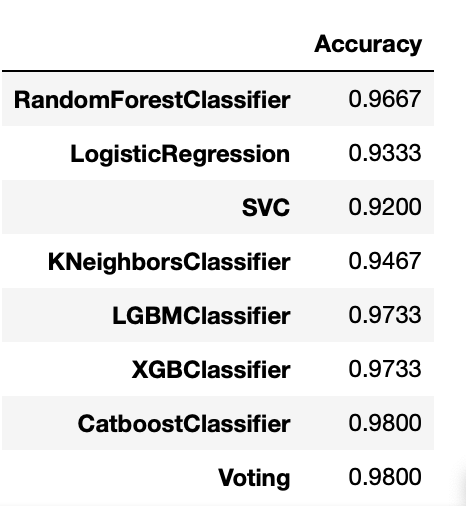
</div>

# RandomizedSearchCV

RandomizedSearchCV는 데이터셋이 큰 경우에 사용하기 적합합니다.  
params의 값들을 랜덤으로 조합하여 최적의 점수를 만드려 노력합니다.

In [14]:
rs = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_jobs=-1,scoring='accuracy')

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.1, 0.05, 0.01,
                                                          0.001],
                                        'max_depth': [3, 5, 7, 10, 12],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

**RandomizedSearchCV를 실행해보면 GridSerachCV보다 빠르게 끝납니다.**

In [15]:
#그래서 최적의 파라미터는?
rs.best_params_

{'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': 5,
 'learning_rate': 0.05}

In [16]:
pred = rs.predict(X_test)
accuracy_score(y_test,pred)

0.9666666666666667

점수가 그대로군요.

**Obseravation**

* 자원 소모를 최소화하기 위해 데이터셋이 작은 경우 ```GridSearch```를 진행하고 큰 경우에는 ```RandomizedSearch```를 진행합니다.

**그럼, RandomizedSearch를 먼저 진행해서 그 근처에 있는 값들을 GridSerach 작업을 해주면 되지 않을까요?**

그래서 우리는 ```Optuna```에 대해 알아봅시다.

# Optuna

**Optuna**는 AutoHyperparameter Tuning입니다.

In [73]:
from optuna.samplers import TPESampler

#Oputna는 함수정의는 필수입니다.
def objectiveLGBM(trial: Trial, X,y,test):
    param = {
        'objective':'binary',
        'metric':'accuracy',
        'verbosity':-1,
        'boosting_type':'gbdt',
        'lambda_l1':trial.suggest_loguniform('lambda_l1',1e-8, 10.0),
        'lambda_l2':trial.suggest_loguniform('lambda_l2',1e-8, 10.0),
        'num_leaves':trial.suggest_int('num_leaves',2,512),
        'learning_rate':0.01,
        'n_estimators':trial.suggest_int('n_estimators',700,3000),
        'feature_fraction':trial.suggest_uniform('feature_fraction',0.4,1.0),
        'bagging_fraction':trial.suggest_uniform('bagging_fraction',0.4,1.0),
        'bagging_freq':trial.suggest_int('min_child_samples',5,100),
        'gpu_use_dp':True
    }
    X_train,X_test,y_train,y_test =train_test_split(X,y,stratify=y, test_size=.3)
    
    lgbm_clf= LGBMClassifier(**param) #딕셔너리와 함수 매개변수를 매칭시키기 위해서 **를 사용해줍니다.
    lgbm_clf=lgbm_clf.fit(X_train,y_train,verbose=False)
    
    score=accuracy_score(y_test,lgbm_clf.predict(X_test))
    return score

study= optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial: objectiveLGBM(trial,X,y,X_test), n_trials=20)
print()
print("Best Trial : score {}, \nparams {}".format(study.best_trial.value, study.best_trial.params))

[I 2022-06-11 17:38:37,815] A new study created in memory with name: no-name-eed31188-3cd9-4834-a8b5-700712ed8930


[LightGBM] [Warning] feature_fraction is set=0.5431533728825284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5431533728825284
[LightGBM] [Warning] lambda_l1 is set=0.0006732669773108209, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006732669773108209
[LightGBM] [Warning] bagging_fraction is set=0.4329320695936746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4329320695936746
[LightGBM] [Warning] lambda_l2 is set=0.006830897794710971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006830897794710971
[LightGBM] [Warning] bagging_freq is set=56, subsample_freq=0 will be ignored. Current value: bagging_freq=56


[I 2022-06-11 17:38:38,030] Trial 0 finished with value: 0.98 and parameters: {'lambda_l1': 0.0006732669773108209, 'lambda_l2': 0.006830897794710971, 'num_leaves': 29, 'n_estimators': 728, 'feature_fraction': 0.5431533728825284, 'bagging_fraction': 0.4329320695936746, 'min_child_samples': 56}. Best is trial 0 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.4098537551772462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4098537551772462
[LightGBM] [Warning] lambda_l1 is set=6.156907439757353e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.156907439757353e-08
[LightGBM] [Warning] bagging_fraction is set=0.7518440647375655, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7518440647375655
[LightGBM] [Warning] lambda_l2 is set=6.795722395178502e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.795722395178502e-07
[LightGBM] [Warning] bagging_freq is set=98, subsample_freq=0 will be ignored. Current value: bagging_freq=98


[I 2022-06-11 17:38:38,857] Trial 1 finished with value: 0.98 and parameters: {'lambda_l1': 6.156907439757353e-08, 'lambda_l2': 6.795722395178502e-07, 'num_leaves': 270, 'n_estimators': 1471, 'feature_fraction': 0.4098537551772462, 'bagging_fraction': 0.7518440647375655, 'min_child_samples': 98}. Best is trial 0 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.459063464205478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.459063464205478
[LightGBM] [Warning] lambda_l1 is set=2.3746381311898028e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3746381311898028e-05
[LightGBM] [Warning] bagging_fraction is set=0.6460308701787878, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6460308701787878
[LightGBM] [Warning] lambda_l2 is set=1.4087546492832441e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4087546492832441e-08
[LightGBM] [Warning] bagging_freq is set=22, subsample_freq=0 will be ignored. Current value: bagging_freq=22


[I 2022-06-11 17:38:39,676] Trial 2 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 2.3746381311898028e-05, 'lambda_l2': 1.4087546492832441e-08, 'num_leaves': 24, 'n_estimators': 2754, 'feature_fraction': 0.459063464205478, 'bagging_fraction': 0.6460308701787878, 'min_child_samples': 22}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.41852986900257116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41852986900257116
[LightGBM] [Warning] lambda_l1 is set=5.561889671825244e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.561889671825244e-05
[LightGBM] [Warning] bagging_fraction is set=0.6601630233445289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6601630233445289
[LightGBM] [Warning] lambda_l2 is set=0.0007581162170513738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007581162170513738
[LightGBM] [Warning] bagging_freq is set=98, subsample_freq=0 will be ignored. Current value: bagging_freq=98


[I 2022-06-11 17:38:40,125] Trial 3 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 5.561889671825244e-05, 'lambda_l2': 0.0007581162170513738, 'num_leaves': 41, 'n_estimators': 1353, 'feature_fraction': 0.41852986900257116, 'bagging_fraction': 0.6601630233445289, 'min_child_samples': 98}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6812199241118018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6812199241118018
[LightGBM] [Warning] lambda_l1 is set=7.691602974616702e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.691602974616702e-06
[LightGBM] [Warning] bagging_fraction is set=0.6689107210336094, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6689107210336094
[LightGBM] [Warning] lambda_l2 is set=2.058970022342264e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.058970022342264e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-06-11 17:38:40,884] Trial 4 finished with value: 0.98 and parameters: {'lambda_l1': 7.691602974616702e-06, 'lambda_l2': 2.058970022342264e-06, 'num_leaves': 433, 'n_estimators': 1799, 'feature_fraction': 0.6812199241118018, 'bagging_fraction': 0.6689107210336094, 'min_child_samples': 7}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5354134999235363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5354134999235363
[LightGBM] [Warning] lambda_l1 is set=1.0906369624448956e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0906369624448956e-08
[LightGBM] [Warning] bagging_fraction is set=0.5241084253769046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5241084253769046
[LightGBM] [Warning] lambda_l2 is set=3.1203739266413923e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1203739266413923e-06
[LightGBM] [Warning] bagging_freq is set=22, subsample_freq=0 will be ignored. Current value: bagging_freq=22


[I 2022-06-11 17:38:41,494] Trial 5 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 1.0906369624448956e-08, 'lambda_l2': 3.1203739266413923e-06, 'num_leaves': 98, 'n_estimators': 1882, 'feature_fraction': 0.5354134999235363, 'bagging_fraction': 0.5241084253769046, 'min_child_samples': 22}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.892076124495224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.892076124495224
[LightGBM] [Warning] lambda_l1 is set=0.034642243252136294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.034642243252136294
[LightGBM] [Warning] bagging_fraction is set=0.4290296369678986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4290296369678986
[LightGBM] [Warning] lambda_l2 is set=0.004611200188119219, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004611200188119219
[LightGBM] [Warning] bagging_freq is set=57, subsample_freq=0 will be ignored. Current value: bagging_freq=57


[I 2022-06-11 17:38:42,025] Trial 6 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.034642243252136294, 'lambda_l2': 0.004611200188119219, 'num_leaves': 327, 'n_estimators': 2050, 'feature_fraction': 0.892076124495224, 'bagging_fraction': 0.4290296369678986, 'min_child_samples': 57}. Best is trial 2 with value: 0.9866666666666667.
[I 2022-06-11 17:38:42,170] Trial 7 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 2.005195558891224, 'lambda_l2': 0.006269108261169477, 'num_leaves': 16, 'n_estimators': 844, 'feature_fraction': 0.5980496941317562, 'bagging_fraction': 0.7204260178979538, 'min_child_samples': 47}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5980496941317562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5980496941317562
[LightGBM] [Warning] lambda_l1 is set=2.005195558891224, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.005195558891224
[LightGBM] [Warning] bagging_fraction is set=0.7204260178979538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7204260178979538
[LightGBM] [Warning] lambda_l2 is set=0.006269108261169477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006269108261169477
[LightGBM] [Warning] bagging_freq is set=47, subsample_freq=0 will be ignored. Current value: bagging_freq=47
[LightGBM] [Warning] feature_fraction is set=0.5398205989791199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5398205989791199
[LightGBM] [Warning] lambda_l1 is set=2.75993204472293e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.75993204472293e-06
[LightGBM] [Warning] bagging_

[I 2022-06-11 17:38:42,738] Trial 8 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 2.75993204472293e-06, 'lambda_l2': 6.437769588293416e-07, 'num_leaves': 245, 'n_estimators': 1886, 'feature_fraction': 0.5398205989791199, 'bagging_fraction': 0.7305119287804183, 'min_child_samples': 52}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6675042512285607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6675042512285607
[LightGBM] [Warning] lambda_l1 is set=1.9026574645292786e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9026574645292786e-07
[LightGBM] [Warning] bagging_fraction is set=0.5883087534743319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5883087534743319
[LightGBM] [Warning] lambda_l2 is set=0.0015768035345628641, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015768035345628641
[LightGBM] [Warning] bagging_freq is set=39, subsample_freq=0 will be ignored. Current value: bagging_freq=39


[I 2022-06-11 17:38:43,605] Trial 9 finished with value: 0.98 and parameters: {'lambda_l1': 1.9026574645292786e-07, 'lambda_l2': 0.0015768035345628641, 'num_leaves': 359, 'n_estimators': 1846, 'feature_fraction': 0.6675042512285607, 'bagging_fraction': 0.5883087534743319, 'min_child_samples': 39}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.8713621809238559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8713621809238559
[LightGBM] [Warning] lambda_l1 is set=0.0022079637634604067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022079637634604067
[LightGBM] [Warning] bagging_fraction is set=0.9311386622321887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9311386622321887
[LightGBM] [Warning] lambda_l2 is set=1.8971931430867264e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8971931430867264e-08
[LightGBM] [Warning] bagging_freq is set=26, subsample_freq=0 will be ignored. Current value: bagging_freq=26


[I 2022-06-11 17:38:44,469] Trial 10 finished with value: 0.98 and parameters: {'lambda_l1': 0.0022079637634604067, 'lambda_l2': 1.8971931430867264e-08, 'num_leaves': 160, 'n_estimators': 2833, 'feature_fraction': 0.8713621809238559, 'bagging_fraction': 0.9311386622321887, 'min_child_samples': 26}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.41308065392899934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41308065392899934
[LightGBM] [Warning] lambda_l1 is set=1.798630429233099e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.798630429233099e-05
[LightGBM] [Warning] bagging_fraction is set=0.8821023865491422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8821023865491422
[LightGBM] [Warning] lambda_l2 is set=3.174076002749405, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.174076002749405
[LightGBM] [Warning] bagging_freq is set=93, subsample_freq=0 will be ignored. Current value: bagging_freq=93


[I 2022-06-11 17:38:45,221] Trial 11 finished with value: 0.98 and parameters: {'lambda_l1': 1.798630429233099e-05, 'lambda_l2': 3.174076002749405, 'num_leaves': 139, 'n_estimators': 2976, 'feature_fraction': 0.41308065392899934, 'bagging_fraction': 0.8821023865491422, 'min_child_samples': 93}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.4094959096821986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4094959096821986
[LightGBM] [Warning] lambda_l1 is set=9.688668770520212e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.688668770520212e-05
[LightGBM] [Warning] bagging_fraction is set=0.6088813008104919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6088813008104919
[LightGBM] [Warning] lambda_l2 is set=4.164901645259843e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.164901645259843e-05
[LightGBM] [Warning] bagging_freq is set=77, subsample_freq=0 will be ignored. Current value: bagging_freq=77


[I 2022-06-11 17:38:45,793] Trial 12 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 9.688668770520212e-05, 'lambda_l2': 4.164901645259843e-05, 'num_leaves': 78, 'n_estimators': 2478, 'feature_fraction': 0.4094959096821986, 'bagging_fraction': 0.6088813008104919, 'min_child_samples': 77}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.8003636924852336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8003636924852336
[LightGBM] [Warning] lambda_l1 is set=0.015579763297130402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015579763297130402
[LightGBM] [Warning] bagging_fraction is set=0.8247601056546301, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8247601056546301
[LightGBM] [Warning] lambda_l2 is set=0.774478930870331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.774478930870331
[LightGBM] [Warning] bagging_freq is set=74, subsample_freq=0 will be ignored. Current value: bagging_freq=74


[I 2022-06-11 17:38:46,144] Trial 13 finished with value: 0.98 and parameters: {'lambda_l1': 0.015579763297130402, 'lambda_l2': 0.774478930870331, 'num_leaves': 189, 'n_estimators': 1399, 'feature_fraction': 0.8003636924852336, 'bagging_fraction': 0.8247601056546301, 'min_child_samples': 74}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.9980763182928427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9980763182928427
[LightGBM] [Warning] lambda_l1 is set=1.1194361601815102e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1194361601815102e-06
[LightGBM] [Warning] bagging_fraction is set=0.9982056143194147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9982056143194147
[LightGBM] [Warning] lambda_l2 is set=1.3649952473955689e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3649952473955689e-08
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2022-06-11 17:38:46,672] Trial 14 finished with value: 0.98 and parameters: {'lambda_l1': 1.1194361601815102e-06, 'lambda_l2': 1.3649952473955689e-08, 'num_leaves': 11, 'n_estimators': 1222, 'feature_fraction': 0.9980763182928427, 'bagging_fraction': 0.9982056143194147, 'min_child_samples': 8}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.4969264437223926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4969264437223926
[LightGBM] [Warning] lambda_l1 is set=8.692598197551303e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.692598197551303e-05
[LightGBM] [Warning] bagging_fraction is set=0.5350549967985276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5350549967985276
[LightGBM] [Warning] lambda_l2 is set=9.312038170662112e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.312038170662112e-05
[LightGBM] [Warning] bagging_freq is set=77, subsample_freq=0 will be ignored. Current value: bagging_freq=77


[I 2022-06-11 17:38:47,331] Trial 15 finished with value: 0.98 and parameters: {'lambda_l1': 8.692598197551303e-05, 'lambda_l2': 9.312038170662112e-05, 'num_leaves': 87, 'n_estimators': 2377, 'feature_fraction': 0.4969264437223926, 'bagging_fraction': 0.5350549967985276, 'min_child_samples': 77}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.484152910628251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.484152910628251
[LightGBM] [Warning] lambda_l1 is set=1.127227646594094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.127227646594094
[LightGBM] [Warning] bagging_fraction is set=0.6437735582825012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6437735582825012
[LightGBM] [Warning] lambda_l2 is set=0.12225058994179183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12225058994179183
[LightGBM] [Warning] bagging_freq is set=28, subsample_freq=0 will be ignored. Current value: bagging_freq=28


[I 2022-06-11 17:38:47,720] Trial 16 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 1.127227646594094, 'lambda_l2': 0.12225058994179183, 'num_leaves': 482, 'n_estimators': 1096, 'feature_fraction': 0.484152910628251, 'bagging_fraction': 0.6437735582825012, 'min_child_samples': 28}. Best is trial 2 with value: 0.9866666666666667.
[I 2022-06-11 17:38:47,860] Trial 17 finished with value: 0.9466666666666667 and parameters: {'lambda_l1': 9.239245022730584, 'lambda_l2': 0.18016301019155836, 'num_leaves': 507, 'n_estimators': 1073, 'feature_fraction': 0.6367878115641539, 'bagging_fraction': 0.8042011697339946, 'min_child_samples': 26}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6367878115641539, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6367878115641539
[LightGBM] [Warning] lambda_l1 is set=9.239245022730584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.239245022730584
[LightGBM] [Warning] bagging_fraction is set=0.8042011697339946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8042011697339946
[LightGBM] [Warning] lambda_l2 is set=0.18016301019155836, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18016301019155836
[LightGBM] [Warning] bagging_freq is set=26, subsample_freq=0 will be ignored. Current value: bagging_freq=26
[LightGBM] [Warning] feature_fraction is set=0.7580064923562359, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7580064923562359
[LightGBM] [Warning] lambda_l1 is set=0.0015302094479334213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015302094479334213
[LightGBM] [Warning] bagging_

[I 2022-06-11 17:38:48,467] Trial 18 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.0015302094479334213, 'lambda_l2': 1.732154188234523e-05, 'num_leaves': 224, 'n_estimators': 2506, 'feature_fraction': 0.7580064923562359, 'bagging_fraction': 0.5272056899857385, 'min_child_samples': 87}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.4828841976915954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4828841976915954
[LightGBM] [Warning] lambda_l1 is set=0.2624278781844968, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2624278781844968
[LightGBM] [Warning] bagging_fraction is set=0.6075396923430939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6075396923430939
[LightGBM] [Warning] lambda_l2 is set=0.10789512796218516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10789512796218516
[LightGBM] [Warning] bagging_freq is set=35, subsample_freq=0 will be ignored. Current value: bagging_freq=35


[I 2022-06-11 17:38:48,865] Trial 19 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.2624278781844968, 'lambda_l2': 0.10789512796218516, 'num_leaves': 509, 'n_estimators': 2206, 'feature_fraction': 0.4828841976915954, 'bagging_fraction': 0.6075396923430939, 'min_child_samples': 35}. Best is trial 2 with value: 0.9866666666666667.



Best Trial : score 0.9866666666666667, 
params {'lambda_l1': 2.3746381311898028e-05, 'lambda_l2': 1.4087546492832441e-08, 'num_leaves': 24, 'n_estimators': 2754, 'feature_fraction': 0.459063464205478, 'bagging_fraction': 0.6460308701787878, 'min_child_samples': 22}


In [26]:
params = study.best_trial.params
params

{'lambda_l1': 0.0005830758138404658,
 'lambda_l2': 3.754538278220935,
 'num_leaves': 70,
 'n_estimators': 2007,
 'feature_fraction': 0.6579710820453142,
 'bagging_fraction': 0.7135716476139702,
 'min_child_samples': 40}

Wow! 맨 밑에 best Trial score이 거의 0.99네요!

이렇게 하이퍼 파라미터 튜닝을 마치겠습니다. 감사합니다.

In [74]:
from optuna.samplers import TPESampler

#Oputna는 함수정의는 필수입니다.
def objectiveLGBM(trial: Trial, X,y,test):
    param = {
        'objective':'binary',
        'metric':'accuracy',
        'verbosity':-1,
        'boosting_type':'gbdt',
        'lambda_l1':trial.suggest_loguniform('lambda_l1',1e-8, 10.0),
        'lambda_l2':trial.suggest_loguniform('lambda_l2',1e-8, 10.0),
        'num_leaves':trial.suggest_int('num_leaves',2,512),
        'learning_rate':0.01,
        'n_estimators':trial.suggest_int('n_estimators',700,3000),
        'feature_fraction':trial.suggest_uniform('feature_fraction',0.4,1.0),
        'bagging_fraction':trial.suggest_uniform('bagging_fraction',0.4,1.0),
        'bagging_freq':trial.suggest_int('min_child_samples',5,100),
        'gpu_use_dp':True
    }
    X_train,X_test,y_train,y_test =train_test_split(X,y,stratify=y, test_size=.3)
    
    lgbm_clf= LGBMClassifier(**param) #딕셔너리와 함수 매개변수를 매칭시키기 위해서 **를 사용해줍니다.
    lgbm_clf=lgbm_clf.fit(X_train,y_train,verbose=False)
    
    score=accuracy_score(y_test,lgbm_clf.predict(X_test))
    return score

study= optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial: objectiveLGBM(trial,X,y,X_test), n_trials=20)
print()
print("Best Trial : score {}, \nparams {}".format(study.best_trial.value, study.best_trial.params))

[I 2022-06-11 17:39:27,072] A new study created in memory with name: no-name-604fbb88-0c3e-4317-87f6-6e071e667fef


[LightGBM] [Warning] feature_fraction is set=0.6995638535089881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6995638535089881
[LightGBM] [Warning] lambda_l1 is set=0.0002002763146545176, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002002763146545176
[LightGBM] [Warning] bagging_fraction is set=0.4334412995586995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4334412995586995
[LightGBM] [Warning] lambda_l2 is set=6.5052527000329235e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.5052527000329235e-06
[LightGBM] [Warning] bagging_freq is set=72, subsample_freq=0 will be ignored. Current value: bagging_freq=72


[I 2022-06-11 17:39:27,352] Trial 0 finished with value: 0.9666666666666667 and parameters: {'lambda_l1': 0.0002002763146545176, 'lambda_l2': 6.5052527000329235e-06, 'num_leaves': 266, 'n_estimators': 842, 'feature_fraction': 0.6995638535089881, 'bagging_fraction': 0.4334412995586995, 'min_child_samples': 72}. Best is trial 0 with value: 0.9666666666666667.


[LightGBM] [Warning] feature_fraction is set=0.7483890238878299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7483890238878299
[LightGBM] [Warning] lambda_l1 is set=3.8010246797094995e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8010246797094995e-08
[LightGBM] [Warning] bagging_fraction is set=0.5190045276487818, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5190045276487818
[LightGBM] [Warning] lambda_l2 is set=1.819129017149953e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.819129017149953e-05
[LightGBM] [Warning] bagging_freq is set=93, subsample_freq=0 will be ignored. Current value: bagging_freq=93


[I 2022-06-11 17:39:27,717] Trial 1 finished with value: 0.96 and parameters: {'lambda_l1': 3.8010246797094995e-08, 'lambda_l2': 1.819129017149953e-05, 'num_leaves': 13, 'n_estimators': 1371, 'feature_fraction': 0.7483890238878299, 'bagging_fraction': 0.5190045276487818, 'min_child_samples': 93}. Best is trial 0 with value: 0.9666666666666667.


[LightGBM] [Warning] feature_fraction is set=0.782702096863569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.782702096863569
[LightGBM] [Warning] lambda_l1 is set=0.10001358784155083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10001358784155083
[LightGBM] [Warning] bagging_fraction is set=0.9201794772442755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9201794772442755
[LightGBM] [Warning] lambda_l2 is set=0.004185971360738919, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004185971360738919
[LightGBM] [Warning] bagging_freq is set=18, subsample_freq=0 will be ignored. Current value: bagging_freq=18


[I 2022-06-11 17:39:28,207] Trial 2 finished with value: 0.96 and parameters: {'lambda_l1': 0.10001358784155083, 'lambda_l2': 0.004185971360738919, 'num_leaves': 44, 'n_estimators': 1717, 'feature_fraction': 0.782702096863569, 'bagging_fraction': 0.9201794772442755, 'min_child_samples': 18}. Best is trial 0 with value: 0.9666666666666667.


[LightGBM] [Warning] feature_fraction is set=0.8098534353205669, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8098534353205669
[LightGBM] [Warning] lambda_l1 is set=1.2577905765833577e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2577905765833577e-06
[LightGBM] [Warning] bagging_fraction is set=0.48328736665012856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48328736665012856
[LightGBM] [Warning] lambda_l2 is set=8.914258933835248, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.914258933835248
[LightGBM] [Warning] bagging_freq is set=83, subsample_freq=0 will be ignored. Current value: bagging_freq=83


[I 2022-06-11 17:39:28,431] Trial 3 finished with value: 0.9466666666666667 and parameters: {'lambda_l1': 1.2577905765833577e-06, 'lambda_l2': 8.914258933835248, 'num_leaves': 191, 'n_estimators': 1254, 'feature_fraction': 0.8098534353205669, 'bagging_fraction': 0.48328736665012856, 'min_child_samples': 83}. Best is trial 0 with value: 0.9666666666666667.


[LightGBM] [Warning] feature_fraction is set=0.9131467002938867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9131467002938867
[LightGBM] [Warning] lambda_l1 is set=0.4223014928482804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4223014928482804
[LightGBM] [Warning] bagging_fraction is set=0.5646602093984662, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5646602093984662
[LightGBM] [Warning] lambda_l2 is set=2.6386528523246426e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6386528523246426e-08
[LightGBM] [Warning] bagging_freq is set=33, subsample_freq=0 will be ignored. Current value: bagging_freq=33


[I 2022-06-11 17:39:29,381] Trial 4 finished with value: 0.98 and parameters: {'lambda_l1': 0.4223014928482804, 'lambda_l2': 2.6386528523246426e-08, 'num_leaves': 479, 'n_estimators': 2681, 'feature_fraction': 0.9131467002938867, 'bagging_fraction': 0.5646602093984662, 'min_child_samples': 33}. Best is trial 4 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.6207655947750106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6207655947750106
[LightGBM] [Warning] lambda_l1 is set=5.281179687174717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.281179687174717
[LightGBM] [Warning] bagging_fraction is set=0.48125856091475716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48125856091475716
[LightGBM] [Warning] lambda_l2 is set=1.3893311759954636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3893311759954636
[LightGBM] [Warning] bagging_freq is set=16, subsample_freq=0 will be ignored. Current value: bagging_freq=16


[I 2022-06-11 17:39:29,752] Trial 5 finished with value: 0.9533333333333334 and parameters: {'lambda_l1': 5.281179687174717, 'lambda_l2': 1.3893311759954636, 'num_leaves': 96, 'n_estimators': 2911, 'feature_fraction': 0.6207655947750106, 'bagging_fraction': 0.48125856091475716, 'min_child_samples': 16}. Best is trial 4 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.7972120714822797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7972120714822797
[LightGBM] [Warning] lambda_l1 is set=0.04339448712519927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04339448712519927
[LightGBM] [Warning] bagging_fraction is set=0.5582800870211597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5582800870211597
[LightGBM] [Warning] lambda_l2 is set=1.6088154428717452e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6088154428717452e-06
[LightGBM] [Warning] bagging_freq is set=55, subsample_freq=0 will be ignored. Current value: bagging_freq=55


[I 2022-06-11 17:39:30,404] Trial 6 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.04339448712519927, 'lambda_l2': 1.6088154428717452e-06, 'num_leaves': 174, 'n_estimators': 2804, 'feature_fraction': 0.7972120714822797, 'bagging_fraction': 0.5582800870211597, 'min_child_samples': 55}. Best is trial 4 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.9825402013757313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9825402013757313
[LightGBM] [Warning] lambda_l1 is set=0.6691728663564324, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6691728663564324
[LightGBM] [Warning] bagging_fraction is set=0.7035101687002194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7035101687002194
[LightGBM] [Warning] lambda_l2 is set=0.00026402529507495474, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00026402529507495474
[LightGBM] [Warning] bagging_freq is set=45, subsample_freq=0 will be ignored. Current value: bagging_freq=45


[I 2022-06-11 17:39:30,757] Trial 7 finished with value: 0.9533333333333334 and parameters: {'lambda_l1': 0.6691728663564324, 'lambda_l2': 0.00026402529507495474, 'num_leaves': 194, 'n_estimators': 2489, 'feature_fraction': 0.9825402013757313, 'bagging_fraction': 0.7035101687002194, 'min_child_samples': 45}. Best is trial 4 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.8089060268709386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8089060268709386
[LightGBM] [Warning] lambda_l1 is set=0.9897499962490854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9897499962490854
[LightGBM] [Warning] bagging_fraction is set=0.8256732743220854, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8256732743220854
[LightGBM] [Warning] lambda_l2 is set=0.022858560065504484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022858560065504484
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2022-06-11 17:39:31,187] Trial 8 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.9897499962490854, 'lambda_l2': 0.022858560065504484, 'num_leaves': 236, 'n_estimators': 1725, 'feature_fraction': 0.8089060268709386, 'bagging_fraction': 0.8256732743220854, 'min_child_samples': 10}. Best is trial 4 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.6545222222062185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6545222222062185
[LightGBM] [Warning] lambda_l1 is set=0.1358085434063923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1358085434063923
[LightGBM] [Warning] bagging_fraction is set=0.410696810126569, subsample=1.0 will be ignored. Current value: bagging_fraction=0.410696810126569
[LightGBM] [Warning] lambda_l2 is set=0.0009864302141676918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009864302141676918
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2022-06-11 17:39:31,823] Trial 9 finished with value: 0.9666666666666667 and parameters: {'lambda_l1': 0.1358085434063923, 'lambda_l2': 0.0009864302141676918, 'num_leaves': 340, 'n_estimators': 2073, 'feature_fraction': 0.6545222222062185, 'bagging_fraction': 0.410696810126569, 'min_child_samples': 8}. Best is trial 4 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.42683469070726954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42683469070726954
[LightGBM] [Warning] lambda_l1 is set=0.0008645260272655939, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008645260272655939
[LightGBM] [Warning] bagging_fraction is set=0.6632474697519851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6632474697519851
[LightGBM] [Warning] lambda_l2 is set=3.580446748870959e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.580446748870959e-08
[LightGBM] [Warning] bagging_freq is set=38, subsample_freq=0 will be ignored. Current value: bagging_freq=38


[I 2022-06-11 17:39:32,659] Trial 10 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.0008645260272655939, 'lambda_l2': 3.580446748870959e-08, 'num_leaves': 487, 'n_estimators': 2316, 'feature_fraction': 0.42683469070726954, 'bagging_fraction': 0.6632474697519851, 'min_child_samples': 38}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.4646403324744878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4646403324744878
[LightGBM] [Warning] lambda_l1 is set=0.0005937495391898014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005937495391898014
[LightGBM] [Warning] bagging_fraction is set=0.6448305428651759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6448305428651759
[LightGBM] [Warning] lambda_l2 is set=1.804986180571419e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.804986180571419e-08
[LightGBM] [Warning] bagging_freq is set=37, subsample_freq=0 will be ignored. Current value: bagging_freq=37


[I 2022-06-11 17:39:33,328] Trial 11 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.0005937495391898014, 'lambda_l2': 1.804986180571419e-08, 'num_leaves': 509, 'n_estimators': 2322, 'feature_fraction': 0.4646403324744878, 'bagging_fraction': 0.6448305428651759, 'min_child_samples': 37}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.442060225743338, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.442060225743338
[LightGBM] [Warning] lambda_l1 is set=0.0014704434925502871, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014704434925502871
[LightGBM] [Warning] bagging_fraction is set=0.6783158986243647, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6783158986243647
[LightGBM] [Warning] lambda_l2 is set=1.1948623934015846e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1948623934015846e-08
[LightGBM] [Warning] bagging_freq is set=36, subsample_freq=0 will be ignored. Current value: bagging_freq=36


[I 2022-06-11 17:39:34,128] Trial 12 finished with value: 0.9666666666666667 and parameters: {'lambda_l1': 0.0014704434925502871, 'lambda_l2': 1.1948623934015846e-08, 'num_leaves': 506, 'n_estimators': 2552, 'feature_fraction': 0.442060225743338, 'bagging_fraction': 0.6783158986243647, 'min_child_samples': 36}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.9769294656054801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9769294656054801
[LightGBM] [Warning] lambda_l1 is set=3.7922655486779195e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7922655486779195e-06
[LightGBM] [Warning] bagging_fraction is set=0.778180321487104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.778180321487104
[LightGBM] [Warning] lambda_l2 is set=1.9431757565402881e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9431757565402881e-07
[LightGBM] [Warning] bagging_freq is set=27, subsample_freq=0 will be ignored. Current value: bagging_freq=27


[I 2022-06-11 17:39:34,937] Trial 13 finished with value: 0.98 and parameters: {'lambda_l1': 3.7922655486779195e-06, 'lambda_l2': 1.9431757565402881e-07, 'num_leaves': 403, 'n_estimators': 2150, 'feature_fraction': 0.9769294656054801, 'bagging_fraction': 0.778180321487104, 'min_child_samples': 27}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5666674980203279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5666674980203279
[LightGBM] [Warning] lambda_l1 is set=0.005123347595902558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005123347595902558
[LightGBM] [Warning] bagging_fraction is set=0.5967066649078088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5967066649078088
[LightGBM] [Warning] lambda_l2 is set=2.7978317541688686e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7978317541688686e-07
[LightGBM] [Warning] bagging_freq is set=57, subsample_freq=0 will be ignored. Current value: bagging_freq=57


[I 2022-06-11 17:39:35,722] Trial 14 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.005123347595902558, 'lambda_l2': 2.7978317541688686e-07, 'num_leaves': 424, 'n_estimators': 2647, 'feature_fraction': 0.5666674980203279, 'bagging_fraction': 0.5967066649078088, 'min_child_samples': 57}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5203575816852717, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5203575816852717
[LightGBM] [Warning] lambda_l1 is set=0.0026209083748355236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026209083748355236
[LightGBM] [Warning] bagging_fraction is set=0.6289470795431638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6289470795431638
[LightGBM] [Warning] lambda_l2 is set=7.357221909987652e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.357221909987652e-07
[LightGBM] [Warning] bagging_freq is set=58, subsample_freq=0 will be ignored. Current value: bagging_freq=58


[I 2022-06-11 17:39:36,610] Trial 15 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.0026209083748355236, 'lambda_l2': 7.357221909987652e-07, 'num_leaves': 408, 'n_estimators': 2980, 'feature_fraction': 0.5203575816852717, 'bagging_fraction': 0.6289470795431638, 'min_child_samples': 58}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5631770840285087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5631770840285087
[LightGBM] [Warning] lambda_l1 is set=1.8963648172487347e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8963648172487347e-05
[LightGBM] [Warning] bagging_fraction is set=0.7608897208877815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7608897208877815
[LightGBM] [Warning] lambda_l2 is set=7.954075577304636e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.954075577304636e-05
[LightGBM] [Warning] bagging_freq is set=69, subsample_freq=0 will be ignored. Current value: bagging_freq=69


[I 2022-06-11 17:39:37,722] Trial 16 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 1.8963648172487347e-05, 'lambda_l2': 7.954075577304636e-05, 'num_leaves': 424, 'n_estimators': 2046, 'feature_fraction': 0.5631770840285087, 'bagging_fraction': 0.7608897208877815, 'min_child_samples': 69}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5233485102192582, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5233485102192582
[LightGBM] [Warning] lambda_l1 is set=0.0060358798256319075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0060358798256319075
[LightGBM] [Warning] bagging_fraction is set=0.9656709234403773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9656709234403773
[LightGBM] [Warning] lambda_l2 is set=3.372148242435805e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.372148242435805e-07
[LightGBM] [Warning] bagging_freq is set=65, subsample_freq=0 will be ignored. Current value: bagging_freq=65


[I 2022-06-11 17:39:38,415] Trial 17 finished with value: 0.9466666666666667 and parameters: {'lambda_l1': 0.0060358798256319075, 'lambda_l2': 3.372148242435805e-07, 'num_leaves': 335, 'n_estimators': 2395, 'feature_fraction': 0.5233485102192582, 'bagging_fraction': 0.9656709234403773, 'min_child_samples': 65}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5388409226186436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5388409226186436
[LightGBM] [Warning] lambda_l1 is set=0.007752400362162684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007752400362162684
[LightGBM] [Warning] bagging_fraction is set=0.5970309056358596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5970309056358596
[LightGBM] [Warning] lambda_l2 is set=1.5328488855821233e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5328488855821233e-06
[LightGBM] [Warning] bagging_freq is set=57, subsample_freq=0 will be ignored. Current value: bagging_freq=57


[I 2022-06-11 17:39:39,615] Trial 18 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.007752400362162684, 'lambda_l2': 1.5328488855821233e-06, 'num_leaves': 371, 'n_estimators': 2988, 'feature_fraction': 0.5388409226186436, 'bagging_fraction': 0.5970309056358596, 'min_child_samples': 57}. Best is trial 10 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6157612910147742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6157612910147742
[LightGBM] [Warning] lambda_l1 is set=6.989056826817238e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.989056826817238e-05
[LightGBM] [Warning] bagging_fraction is set=0.6144809447131316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6144809447131316
[LightGBM] [Warning] lambda_l2 is set=2.1155251942547537e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1155251942547537e-05
[LightGBM] [Warning] bagging_freq is set=80, subsample_freq=0 will be ignored. Current value: bagging_freq=80


[I 2022-06-11 17:39:40,593] Trial 19 finished with value: 0.9666666666666667 and parameters: {'lambda_l1': 6.989056826817238e-05, 'lambda_l2': 2.1155251942547537e-05, 'num_leaves': 294, 'n_estimators': 2617, 'feature_fraction': 0.6157612910147742, 'bagging_fraction': 0.6144809447131316, 'min_child_samples': 80}. Best is trial 10 with value: 0.9866666666666667.



Best Trial : score 0.9866666666666667, 
params {'lambda_l1': 0.0008645260272655939, 'lambda_l2': 3.580446748870959e-08, 'num_leaves': 487, 'n_estimators': 2316, 'feature_fraction': 0.42683469070726954, 'bagging_fraction': 0.6632474697519851, 'min_child_samples': 38}


In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index,
                        columns=["PC1","PC2"])

kmeans= KMeans(n_clusters=4)
kmeans.fit(X_train)
clusters= pd.Series(kmeans.labels_, name="cluster",index=X_train.index)
centroids= pca.transform(kmeans.cluster_centers_)

X_reduced= pd.concat([X_reduced,y_train,clusters],axis=1)
X_reduced

,PC1,PC2,diagnosis,cluster
5,-209.8783,-82.1538,1,2
116,-734.1226,-24.8172,0,0
45,810.6957,-18.2710,1,1
16,236.9705,-119.4367,1,2
462,-125.8295,62.7767,0,2
...,...,...,...,...
106,-431.0127,-19.1073,0,0
270,-176.0975,77.6177,0,2
348,-475.7559,-3.3501,0,0
435,-36.6790,-48.7963,1,2


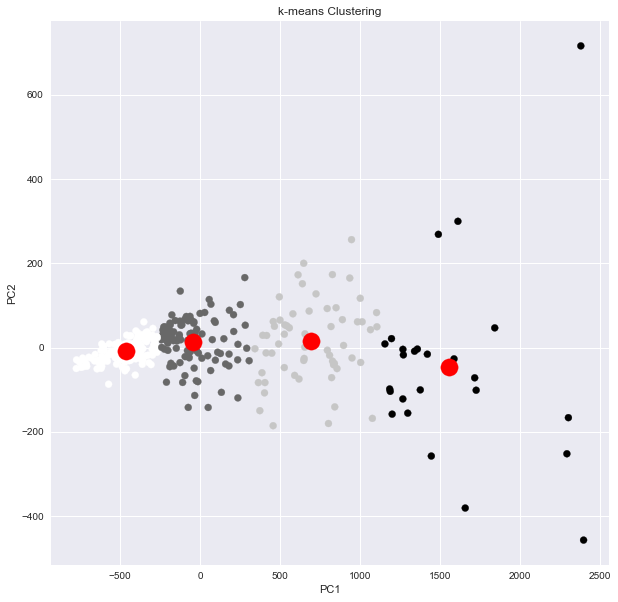

In [70]:
plt.figure(figsize=(10, 10))
plt.scatter(X_reduced['PC1'], X_reduced['PC2'], c=X_reduced['cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', s=300)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("k-means Clustering")
plt.show()

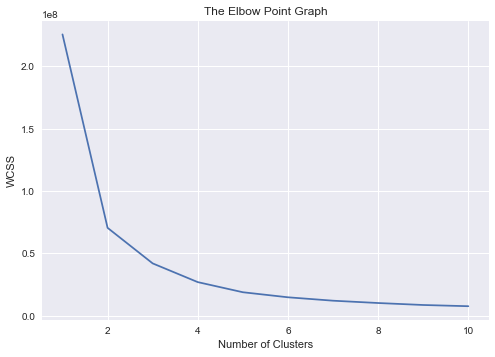

In [32]:
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()